In [263]:
pip install norm

Note: you may need to restart the kernel to use updated packages.


In [264]:
%pip install scipy

import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import xlwings as xw
import matplotlib.pyplot as plt
from scipy.stats import norm

Note: you may need to restart the kernel to use updated packages.


In [265]:
# Make sure 'Richspread.xlsx' is in the same directory as your notebook, or provide the full path
book = xw.Book('Richspread.xlsx')  # or use the full path, e.g. r'C:/Users/yourname/Documents/Richspread.xlsx'
sht = book.sheets['VAR_inputs']

In [266]:
tickers = sht.range('B2:K2').value
tickers = [t for t in tickers if t is not None]  # Remove any empty cells
print(tickers)

weights = sht.range('B12:AA12').value
weights = [w for w in weights if w is not None]  # Remove any empty cells
print(weights)

['AAPL', 'GOOG', 'SPY', 'MSFT', 'JNJ', 'NVDA', 'UNH', 'JPM', 'XOM', 'SNAP']
[0.0784477868038095, 0.07010202706004177, 0.11835554977324375, 0.18576526966929557, 0.06109103981729987, 0.05624998896193308, 0.12166049417965183, 0.11633317968344199, 0.021092028828094814, 0.033771578930223915, 0.13713105629296382]


In [267]:


endDate = sht.range('B8').value.strftime('%Y-%m-%d')
startDate =sht.range('B6').value.strftime('%Y-%m-%d')


close_df = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start=startDate, end=endDate)
    # Use 'Close' instead of 'Adj Close'
    close_df[ticker] = data['Close']

print(close_df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                  AAPL        GOOG         SPY        MSFT         JNJ  \
Date                                                                     
2015-06-15   28.425865   26.204241  175.939636   39.435276   73.809189   
2015-06-16   28.578171   26.251459  176.898758   39.738762   74.467865   
2015-06-17   28.510983   26.306631  177.184799   39.860161   74.747986   
2015-06-18   28.640873   26.677923  179.027435   40.510468   75.982048   
2015-06-19   28.354198   26.675934  178.232681   39.972874   75.603500   
...                ...         ...         ...         ...         ...   
2025-06-04  202.820007  169.186630  595.929993  463.869995  153.220001   
2025-06-05  200.630005  169.606125  593.049988  467.679993  153.660004   
2025-06-06  203.919998  174.709991  599.140015  470.380005  155.029999   
2025-06-09  201.449997  177.630005  599.679993  472.750000  155.229996   
2025-06-10  202.669998  180.009995  603.080017  470.920013  156.449997   

                  NVDA         UNH   

In [268]:
log_returns = np.log(close_df / close_df.shift(1))
log_returns = log_returns.dropna()
print(log_returns)


                AAPL      GOOG       SPY      MSFT       JNJ      NVDA  \
Date                                                                     
2017-03-03  0.005884 -0.001868  0.000629  0.003743  0.001293 -0.005774   
2017-03-06 -0.003153 -0.001569 -0.002982  0.000311 -0.000647 -0.007751   
2017-03-07  0.001291  0.004977 -0.002991  0.002021  0.000970  0.010896   
2017-03-08 -0.003735  0.004150 -0.001858  0.009120  0.002178 -0.001824   
2017-03-09 -0.002304  0.003955  0.001267 -0.004009  0.014797 -0.000203   
...              ...       ...       ...       ...       ...       ...   
2025-06-04 -0.002216  0.009967 -0.000269  0.001942 -0.007801  0.004945   
2025-06-05 -0.010856  0.002476 -0.004845  0.008180  0.002868 -0.013692   
2025-06-06  0.016265  0.029649  0.010217  0.005757  0.008876  0.012282   
2025-06-09 -0.012187  0.016575  0.000901  0.005026  0.001289  0.006401   
2025-06-10  0.006038  0.013310  0.005654 -0.003878  0.007829  0.009282   

                 UNH       JPM       

In [269]:
def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)

In [270]:
cov_matrix = log_returns.cov()
print(cov_matrix)
# Annualize the covariance matrix

          AAPL      GOOG       SPY      MSFT       JNJ      NVDA       UNH  \
AAPL  0.000363  0.000229  0.000178  0.000239  0.000073  0.000355  0.000123   
GOOG  0.000229  0.000356  0.000167  0.000243  0.000059  0.000354  0.000113   
SPY   0.000178  0.000167  0.000145  0.000172  0.000068  0.000266  0.000112   
MSFT  0.000239  0.000243  0.000172  0.000309  0.000071  0.000373  0.000128   
JNJ   0.000073  0.000059  0.000068  0.000071  0.000145  0.000050  0.000092   
NVDA  0.000355  0.000354  0.000266  0.000373  0.000050  0.001042  0.000149   
UNH   0.000123  0.000113  0.000112  0.000128  0.000092  0.000149  0.000361   
JPM   0.000149  0.000143  0.000155  0.000140  0.000079  0.000206  0.000128   
XOM   0.000113  0.000101  0.000120  0.000089  0.000067  0.000130  0.000105   
SNAP  0.000275  0.000340  0.000217  0.000272  0.000028  0.000528  0.000081   

           JPM       XOM      SNAP  
AAPL  0.000149  0.000113  0.000275  
GOOG  0.000143  0.000101  0.000340  
SPY   0.000155  0.000120  0.00

In [271]:
def standard_deviation (weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

In [272]:
weights = np.array(weights)  # Ensure weights is a numpy array for matrix operations

# Ensure weights matches the number of tickers/assets
weights = weights[:len(tickers)]

Portfolio_value = sht.range('B10').value,  # Equal weights for each asset
portfolio_expected_return = expected_return(weights, log_returns)
portfolio_std_dev = standard_deviation(weights, cov_matrix)

In [273]:
def random_z_score():
    return np.random.normal(0, 1)
 

In [274]:
days = sht.range('B14').value

def scenario_gain_loss(portfolio_value, portfolio_expected_return, portfolio_std_dev, z_score, days):
    return portfolio_value * portfolio_expected_return * days + portfolio_value * portfolio_std_dev * z_score * np.sqrt(days)

In [275]:
def scenario_gain_loss(portfolio_value, portfolio_expected_return, portfolio_std_dev, z_score, days):
    return portfolio_value * portfolio_expected_return * days + portfolio_value * portfolio_std_dev * z_score * np.sqrt(days)

simulations = sht.range('B16').value
scenarioReturn = []

# Extract scalar value from Portfolio_value tuple
portfolio_value_scalar = Portfolio_value[0]

for i in range(int(simulations)):
    z_score = random_z_score()
    scenarioReturn.append(scenario_gain_loss(portfolio_value_scalar, portfolio_expected_return, portfolio_std_dev, z_score, days))

In [276]:
confidence_interval = sht.range('B18').value
VaR =-np.percentile(scenarioReturn, 100*(1-confidence_interval))
print(f"Value at Risk (VaR) at {confidence_interval*100}% confidence level: ${VaR:.2f}")

Value at Risk (VaR) at 95.0% confidence level: $22641.40


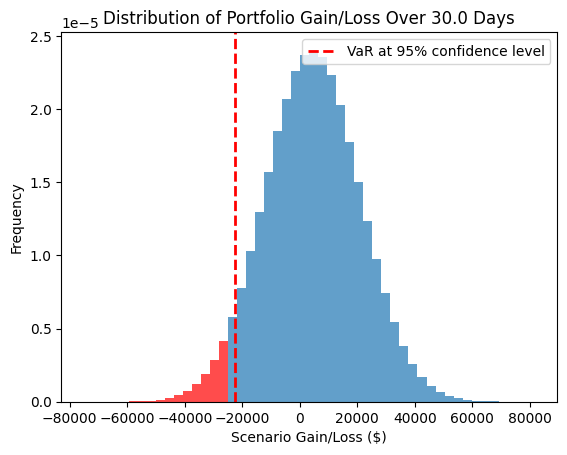

In [277]:
# ...existing code...
# Plot histogram and get bin info
n, bins, patches = plt.hist(scenarioReturn, bins=50, density=True, alpha=0.7)

plt.xlabel('Scenario Gain/Loss ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio Gain/Loss Over {days} Days')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')

# Color the left tail (losses worse than VaR) in red
for i in range(len(bins)-1):
    if bins[i+1] < -VaR:
        patches[i].set_facecolor('red')

plt.legend()
plt.savefig('var_hist.png')
plt.show()
# ...existing code...


In [278]:
book = xw.Book('Richspread.xlsx')
portfolio = book.sheets['Portfolio']
confidence_pct = int(confidence_interval * 100)
statement = f"There is a {confidence_pct}% confidence that the portfolio will not lose more than ${VaR:,.2f} over {days} days."

# Print to notebook output
print(statement)

# Writto Excel (for example, cell B22)
portfolio.range('A24').value = statement
portfolio.pictures.add('var_hist.png', name='VaR_Hist', update=True, left=portfolio.range('A25').left, top=portfolio.range('A25').top)


There is a 95% confidence that the portfolio will not lose more than $22,641.40 over 30.0 days.


<Picture 'VaR_Hist' in <Sheet [Richspread.xlsx]Portfolio>>